## Generating Fake images with Generative Adversarial Networks(GAN) 

### Steps to Perform
'''
Step 1: Import the Necessary Libraries

Step 2: Load and Preprocess the Data

Step 3: Build the Generator and Discriminator

Step 4: Compile the Models

Step 5: Train the Models

Step 6: Execute the Training

Step 7: Generate New Images and Evaluate the Model's Performance
'''

##### Step1: Import Necessary Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten
from tensorflow.keras.models import Sequential, Model
import numpy as np

##### Step2: Load and Preprocess Dataset

In [2]:
# Load mnist Dataset
(X_train,_),(_,_)=mnist.load_data()
# Normalize to between -1 to 1
X_train=(X_train.astype(np.float32)-127.5)/127.5
X_train=np.expand_dims(X_train,axis=3)

##### Step3: Build the Generator & Discriminator

In [5]:
# Define the generator & Discrimantor models
# Generator takes a random noise vector as input and outputs an image

# Generator
def create_generator():
    model=Sequential()
    model.add(Dense(256,input_dim=100,activation='relu'))
    model.add(Dense(521,activation='relu'))
    model.add(Dense(1024,activation='relu'))
    model.add(Dense(784,activation='tanh'))
    model.add(Reshape((28,28,1)))
    return model

# Discriminator takes an image as input and outputs the probability of image being real

# Discriminator
def create_discriminator():
    model=Sequential()
    model.add(Flatten(input_shape=(28,28,1)))
    model.add(Dense(1024,activation='relu'))
    model.add(Dense(512,activation='relu'))
    model.add(Dense(256,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    return model




##### Step4: Compile the models

In [6]:
# Define loss function & the optimizer
# The loss function evaluates model's performance, while the optimizer aims to minimize loss

# Create & compile Discriminator
discriminator=create_discriminator()
discriminator.compile(loss='binary_crossentropy',optimizer='adam')

# Create & compile Generator
generator=create_generator()
generator.compile(loss='binary_crossentropy',optimizer='adam')

# Create & compile the combined model
discriminator.trainable=False
gan_input = Input(shape=(100,))
x=generator(gan_input)
gan_output=discriminator(x)
gan=Model(inputs=gan_input,outputs=gan_output)
gan.compile(loss='binary_crossentropy',optimizer='adam')

##### Step5: Train the Model

In [7]:
# Involves feeding data into models and adjusting weights of the models based on output
# The primary aim is for generator to create images indistinguishable from real images by discriminator
batch_size=128
epochs=1
def train(epochs=1,batch_size=128):
    # Load the data
    (X_train,_),(_,_)=mnist.load_data()
    X_batch=(X_train.astype(np.float32)-127.5/127.5)
    X_train=np.expand_dims(X_train,axis=3)

# Labels for batch size and test size
y_train_ones=np.ones((batch_size,1))
y_train_zeros=np.zeros((batch_size,1))
y_test_ones=np.ones((100,1))

# Start Training
for e in range(epochs):
    for i in range(X_train.shape[0]//batch_size):
        # Train discriminator weights
        discriminator.trainable=True
        
        # Real samples
        # X_batch: A batch of real images is selected from the training dataset
        X_batch=X_train[i*batch_size:(i+1)*batch_size]
        #d_loss_real: The Discriminator is trained on these real images using the train_on_batch() method, which updates the weights of the Discriminator based on the batch of data provided. The label for these images is y_train_ones (ones), indicating that these are real images.
        #Label Smoothing: The labels are slightly perturbed by multiplying with a random number between 0.9 and 1.0 (1 - 0.1 * np.random.rand(batch_size, 1)). This technique, called label smoothing, helps the model generalize better and prevents it from becoming overconfident.
        d_loss_real = discriminator.train_on_batch(x=X_batch, y=y_train_ones * (1 - 0.1 * np.random.rand(batch_size, 1)))

        # Fake Samples
        z_noise = np.random.normal(loc=0, scale=1, size=(batch_size, 100))
        #z_noise: A batch of random noise vectors is generated, drawn from a standard normal distribution (mean=0, standard deviation=1).
        X_fake = generator.predict_on_batch(z_noise)
        #X_fake: The Generator uses this noise to create fake images by predicting on the batch of noise (predict_on_batch(z_noise)).
        d_loss_fake = discriminator.train_on_batch(x=X_fake, y=y_train_zeros)
        #d_loss_fake: The Discriminator is trained on these fake images using train_on_batch(). The label for these images is y_train_zeros (zeros), indicating that these are fake images.

        # Discriminator loss
        d_loss = 0.5 * (d_loss_real + d_loss_fake)
        # Train Generator weights
        discriminator.trainable = False
        g_loss = gan.train_on_batch(x=z_noise, y=y_train_ones)

        print(f'Epoch: {e+1}, Batch: {i}, D Loss: {d_loss}, G Loss: {g_loss}')

Epoch: 1, Batch: 0, D Loss: 0.7666290998458862, G Loss: [array(0.92766815, dtype=float32), array(0.92766815, dtype=float32), array(0.92766815, dtype=float32)]
Epoch: 1, Batch: 1, D Loss: 1.02411687374115, G Loss: [array(1.2127218, dtype=float32), array(1.2127218, dtype=float32), array(1.2127218, dtype=float32)]
Epoch: 1, Batch: 2, D Loss: 1.0961523056030273, G Loss: [array(1.1434026, dtype=float32), array(1.1434026, dtype=float32), array(1.1434026, dtype=float32)]
Epoch: 1, Batch: 3, D Loss: 1.119504690170288, G Loss: [array(1.1008188, dtype=float32), array(1.1008188, dtype=float32), array(1.1008188, dtype=float32)]
Epoch: 1, Batch: 4, D Loss: 0.9900294542312622, G Loss: [array(0.9788741, dtype=float32), array(0.9788741, dtype=float32), array(0.9788741, dtype=float32)]
Epoch: 1, Batch: 5, D Loss: 0.8861650228500366, G Loss: [array(0.86378956, dtype=float32), array(0.86378956, dtype=float32), array(0.86378956, dtype=float32)]
Epoch: 1, Batch: 6, D Loss: 0.7916315793991089, G Loss: [arra

In [9]:
# Call the train function
train(epochs=50, batch_size=128)

##### Step7: Generate New Images and Evaluate the Model's Performance

'''
- Generate new images and evaluate the performance of the GAN.
- Generate a random noise vector and feed it into the trained generator to create new images.
'''

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


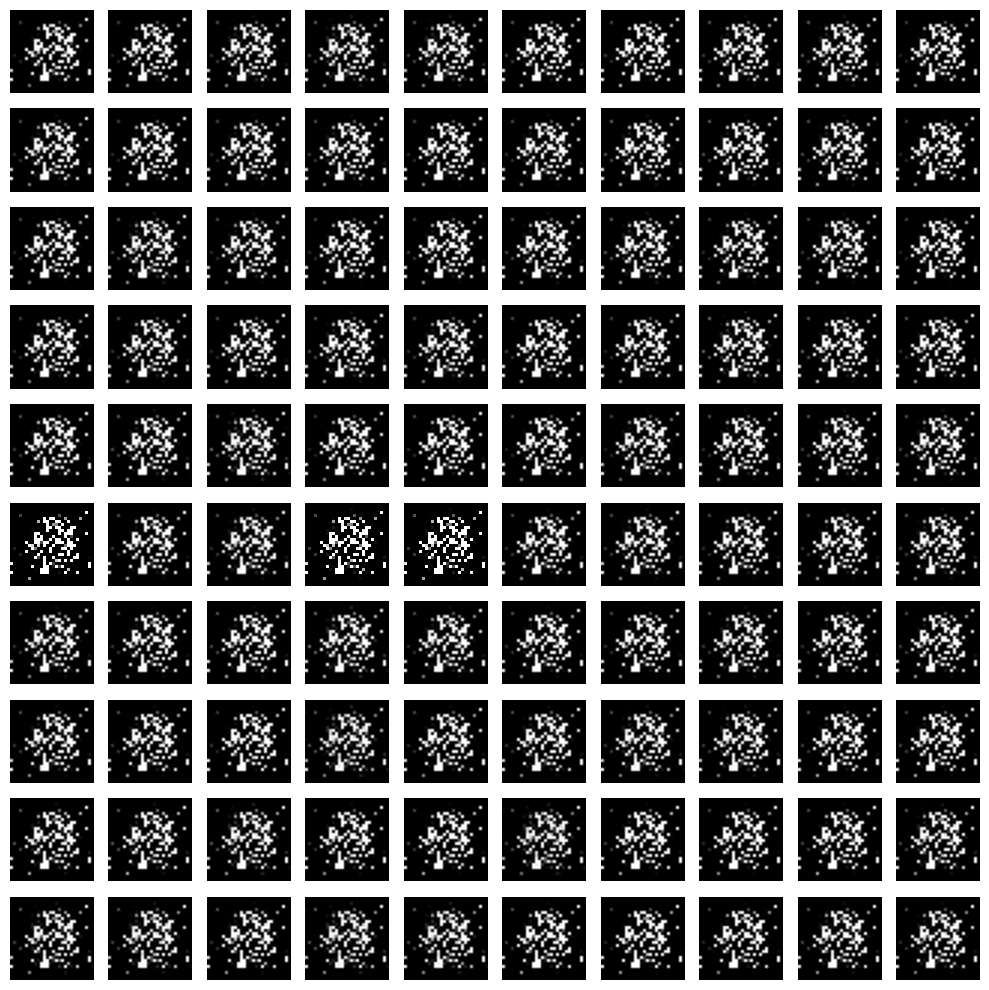

In [10]:
import matplotlib.pyplot as plt
# Generate random noise as an input to initialize the generator
random_noise = np.random.normal(0,1, [100, 100])

# Generate the images from the noise
generated_images = generator.predict(random_noise)

# Visualize the generated images
plt.figure(figsize=(10,10))
for i in range(generated_images.shape[0]):
    plt.subplot(10, 10, i+1)
    plt.imshow(generated_images[i, :, :, 0], cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

'''
Notes:

The output effectively demonstrates how model can generate images resembling handwritten digit 8. However, there is room for improving the quality of these images.

'''
